# Basic Data Visualization
The following code was done as a part of a DataQuest guided project which offered practice with basic data visualization using matplotlib. The dataset loaded into a pandas DataFrame contains information about 173 different college majors. Columns include the number of men in the major, number of women, the percentage of women, how many graduates of the major are unemployed, etc.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads = pd.read_csv('recent-grads.csv')

recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


After reading in the data into a pandas DataFrame, a 2x2 figure containing 4 subplots was created. The scatter plots show the relationship between the share of women and the unemployment rate for each major. The histograms show the frequency of different share percentages of women in each major. 

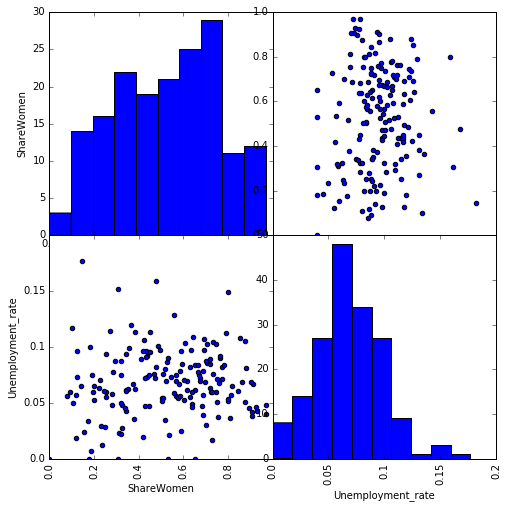

In [3]:
# Step 3: Create the Figure and 4 Axes
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# Step 3: Generate the graphs that belong to each axe
ax1.hist(recent_grads['ShareWomen'])
ax2.scatter(recent_grads['Unemployment_rate'], recent_grads['ShareWomen'])
ax3.scatter(recent_grads['ShareWomen'], recent_grads['Unemployment_rate'])
ax4.hist(recent_grads['Unemployment_rate'])

# Step 4: Hide x-axis ticks for top two rows
#ax1.xaxis.set_visible(False)
ax2.xaxis.set_visible(False)

# Step 4: Assign column names
ax1.set_ylabel('ShareWomen')
ax3.set_xlabel('ShareWomen')
ax3.set_ylabel('Unemployment_rate')
ax4.set_xlabel('Unemployment_rate')

# Step 4: Remove the spacing
fig.subplots_adjust(hspace=0, wspace=0)

# Step 5: Set x and y limits:
ax1.set_ylim([0,30])
ax2.set_ylim([0.0,1.0])
ax3.set_xlim([0.0, 1.0])
ax3.set_ylim([0.0, 0.20])
ax4.set_xlim([0.0, 0.20])

# Step 5: Set the tick labels
ax1.set_yticklabels([0, 5, 10, 15, 20, 25, 30])
ax3.set_yticklabels([0.00, 0.05, 0.10, 0.15])
ax3.set_xticklabels([0.0, 0.2, 0.4, 0.6, 0.8], rotation=90)
ax4.set_xticklabels([0.00, 0.05, 0.10, 0.15, 0.20], rotation=90)


plt.show()

One more histogram was created. This graph shows the representation of men and women in different categories of Arts majors. As you can see, the histograms for each category add up to 100% as expected.

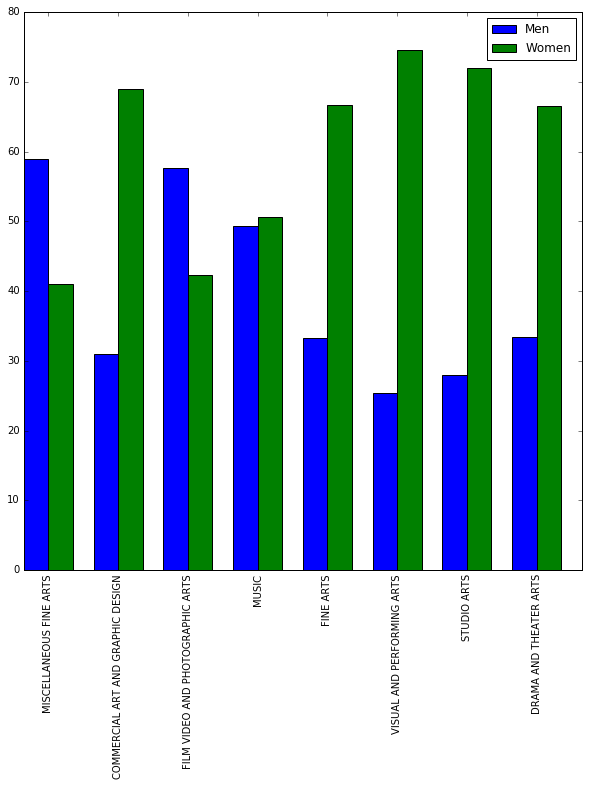

In [5]:
import numpy as np

recent_grads['ShareMen'] = recent_grads['Men'] / recent_grads['Total']
arts_df = recent_grads[recent_grads['Major_category'] == 'Arts']

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

n = len(set(arts_df['Major']))
locs = np.arange(0,len(arts_df['Major']))
offset_locs = locs + 0.35
men_height = (arts_df['ShareMen']*100).tolist()
women_height = (arts_df['ShareWomen']*100).tolist()
majors = arts_df['Major'].tolist()



bar1 = ax.bar(left=locs, height=men_height, width=0.35, label='Men')
bar2 = ax.bar(left=offset_locs, height=women_height, width=0.35, color='green', label='Women')
plt.legend()
ax.set_xticklabels(majors, rotation=90)
ax.set_xticks(offset_locs)
plt.show()
